In [ ]:
#put observations here
# It appears that Capomulin and Ramicane are both effective at prolonging life of cancerous mice
# There does not seem to be any difference between survival rates of Capomulin and Ramicane
# None of the other drugs seemed to differ from the placebo


In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem, ttest_ind

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_df = pd.read_csv(mouse_drug_data_to_load)
clinical_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
pre_combined_df = pd.merge(clinical_df, mouse_df, on="Mouse ID")

#Drop the dataset to the 4 in the examples
combined_df = pre_combined_df.loc[pre_combined_df['Drug'].isin(['Capomulin', 'Infubinol', 'Ketapril', 'Ramicane', 'Placebo'])]

# Display the data table for preview
combined_df.head()


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
pre_mean_tumor_vol = combined_df.groupby(["Drug","Timepoint"])[["Tumor Volume (mm3)"]].mean()
# Convert to DataFrame
pre_mean_tumor_vol.reset_index(inplace = True)
# Preview DataFrame
pre_mean_tumor_vol.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [3]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
pre_sem_tumor_vol = combined_df.groupby(["Drug","Timepoint"])[["Tumor Volume (mm3)"]].sem()
# Convert to DataFrame
pre_sem_tumor_vol.reset_index(inplace = True)
# Preview DataFrame
pre_sem_tumor_vol.head()


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [4]:
# Minor Data Munging to Re-Format the Data Frames
mean_tumor_vol = pre_mean_tumor_vol.pivot(index='Timepoint', columns = 'Drug')
mean_tumor_vol.columns = mean_tumor_vol.columns.droplevel()
sem_tumor_vol = pre_sem_tumor_vol.pivot(index='Timepoint', columns = 'Drug')
sem_tumor_vol.columns = sem_tumor_vol.columns.droplevel()
# Preview that Reformatting worked
times = mean_tumor_vol.keys()
print(times)
mean_tumor_vol.head()

Index(['Capomulin', 'Infubinol', 'Ketapril', 'Placebo', 'Ramicane'], dtype='object', name='Drug')


Drug,Capomulin,Infubinol,Ketapril,Placebo,Ramicane
Timepoint,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,47.062001,47.389175,47.125589,43.944859
10,43.084291,49.403909,49.582269,49.423329,42.531957
15,42.064317,51.296397,52.399974,51.359742,41.495061
20,40.716325,53.197691,54.920935,54.364417,40.238325


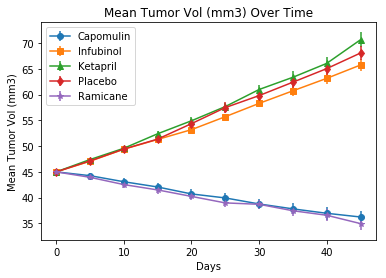

In [5]:
# Generate the Plot (with Error Bars)
plt.title('Mean Tumor Vol (mm3) Over Time')
plt.xlabel('Days')
plt.ylabel('Mean Tumor Vol (mm3)')

markers = ['o', 's', '^', 'd', '*']
for i, col in enumerate(mean_tumor_vol.columns):
    err_plt = plt.errorbar(mean_tumor_vol.index, mean_tumor_vol[col], 
                           yerr=sem_tumor_vol[col], label = mean_tumor_vol[col].name, marker=markers[i])

plt.legend(loc = "best")
# Save the Figure

#plt.show()

In [6]:
# Show the Figure
plt.show()

## Metastatic Response to Treatment

In [7]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
pre_mean_met_sites = combined_df.groupby(['Drug', 'Timepoint'])[["Metastatic Sites"]].mean()
# Convert to DataFrame
pre_mean_met_sites.reset_index(inplace=True)
# Preview DataFrame
pre_mean_met_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.160000
2,Capomulin,10,0.320000
3,Capomulin,15,0.375000
4,Capomulin,20,0.652174


In [8]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
pre_sem_met_sites = combined_df.groupby(['Drug', 'Timepoint'])[["Metastatic Sites"]].sem()
# Convert to DataFrame
pre_sem_met_sites.reset_index(inplace=True)
# Preview DataFrame
pre_sem_met_sites.head()

,Drug,Timepoint,Metastatic Sites
0,Capomulin,0,0.000000
1,Capomulin,5,0.074833
2,Capomulin,10,0.125433
3,Capomulin,15,0.132048
4,Capomulin,20,0.161621


In [9]:
# Minor Data Munging to Re-Format the Data Frames
mean_met_sites = pre_mean_met_sites.pivot(index='Timepoint', columns = 'Drug')
mean_met_sites.columns = mean_met_sites.columns.droplevel()
sem_met_sites = pre_sem_met_sites.pivot(index='Timepoint', columns = 'Drug')
sem_met_sites.columns = sem_met_sites.columns.droplevel()
# Preview that Reformatting worked
mean_met_sites.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo,Ramicane
Timepoint,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.280000,0.304348,0.375000,0.120000
10,0.320000,0.666667,0.590909,0.833333,0.250000
15,0.375000,0.904762,0.842105,1.250000,0.333333
20,0.652174,1.050000,1.210526,1.526316,0.347826


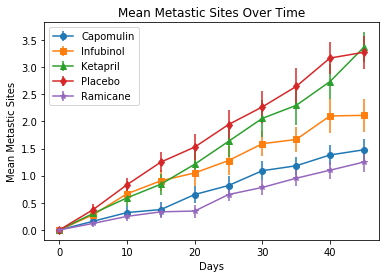

In [10]:
# Generate the Plot (with Error Bars)
plt.title('Mean Metastic Sites Over Time')
plt.xlabel('Days')
plt.ylabel('Mean Metastic Sites')
for i, col in enumerate(mean_met_sites.columns):
    met_err_plt = plt.errorbar(mean_met_sites.index, mean_met_sites[col], yerr=sem_met_sites[col], label = mean_met_sites[col].name, marker=markers[i])
# Save the Figure
plt.legend(loc='best')
# Show the Figure


## Survival Rates

In [11]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
pre_count_mice = combined_df.groupby(['Drug', 'Timepoint'])[["Mouse ID"]].count()
# Convert to DataFrame
pre_count_mice.reset_index(inplace=True)
# Preview DataFrame
pre_count_mice.head()

,Drug,Timepoint,Mouse ID
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [12]:
# Minor Data Munging to Re-Format the Data Frames
count_mice = pre_count_mice.pivot(index='Timepoint', columns = 'Drug')
count_mice.columns = count_mice.columns.droplevel()
# Preview the Data Frame
count_mice.head()

Drug,Capomulin,Infubinol,Ketapril,Placebo,Ramicane
Timepoint,,,,,
0,25,25,25,25,25
5,25,25,23,24,25
10,25,21,22,24,24
15,24,21,19,20,24
20,23,20,19,19,23


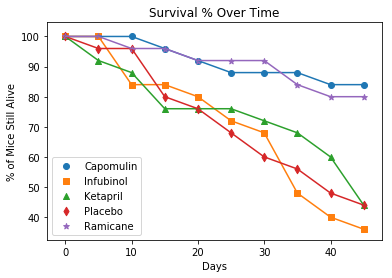

In [13]:
#move the % calc to a variable and adjust formatting
plt.title('Survival % Over Time')
plt.xlabel('Days')
plt.ylabel('% of Mice Still Alive')

# Generate the Plot (Accounting for percentages)
for i, col in enumerate(mean_tumor_vol.columns):
    surv_percent = (count_mice[col]/count_mice[col].iloc[0])*100
    surv_sctr_plt = plt.scatter(count_mice.index, surv_percent, label = count_mice[col].name, marker=markers[i])
    surv_line_plt = plt.plot(count_mice.index, surv_percent, label = "")
    
# Save the Figure
plt.legend(loc='best')
# Show the Figure
plt.show()

## Summary Bar Graph

In [14]:
# Calculate the percent changes for each drug
per_change = ((mean_tumor_vol.iloc[-1,:]-mean_tumor_vol.loc[0,:])/mean_tumor_vol.loc[0,:])*100
# Display the data to confirm
per_change

Drug
Capomulin   -19.475303
Infubinol    46.123472
Ketapril     57.028795
Placebo      51.297960
Ramicane    -22.320900
dtype: float64

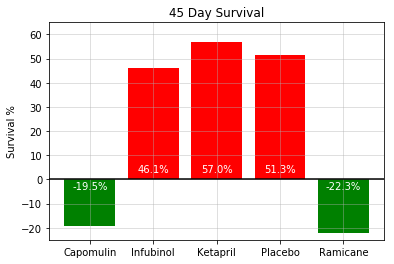

In [15]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes
x_labels = per_change.index

# Call functions to implement the function calls


# Save the Figure


# Show the Figure
plt.bar(np.arange(len(x_labels)), 
        per_change, 
        # colors each bar appropriately based on + or - values by using a conditional
        color = ['r' if per_change[r] > 0 else 'g' for r in np.arange(len(x_labels))]
       )

plt.title('45 Day Survival')
plt.ylabel('Survival %')
plt.xticks(np.arange(len(x_labels)),x_labels)
plt.grid(alpha=0.5)
plt.ylim(-25,65)
plt.axhline(y=0, color = 'black')
for i, t in enumerate(per_change):
    if t<0:
        y_mark = -4
    else:
        y_mark = 3
    plt.text(i, y_mark, str(round(t, 1)) + '%', ha='center', color = 'w')

In [16]:
for i,col in enumerate(count_mice.columns):
    t_result = ttest_ind(count_mice[col], count_mice['Placebo'], equal_var=False)
    #use p/2 for one tailed test
    if t_result[1]/2 < 0.05:
        print(count_mice[col].name + " appears to be different than Placebo")
    else:
        print(count_mice[col].name + " is not different than Placebo")

Capomulin appears to be different than Placebo
Infubinol is not different than Placebo
Ketapril is not different than Placebo
Placebo is not different than Placebo
Ramicane appears to be different than Placebo


In [20]:
#this one is a two tailed test
t_result = ttest_ind(count_mice['Capomulin'], count_mice['Ramicane'], equal_var=False)

In [21]:
t_result

Ttest_indResult(statistic=0.2544566789039904, pvalue=0.8020804708141849)